In [12]:
from HopfieldNet import ClassicHopfield, DiscreteHopfield, ContinuousHopfield

In [13]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

In [14]:
IMG_SHAPE = (64, 64)
DISCRETE_IMG_DIR = "imgs/discrete"
CONTINUOUS_IMG_DIR = "imgs/continuous"

In [15]:
def load_images(d: str, shape=(64, 64), binary: bool=True) -> np.ndarray:
    images = []
    for filename in os.listdir(d):
        img = Image.open(os.path.join(d, filename)).convert("L")
        img = img.resize(shape)  # Resize to shape
        img_array = np.array(img).flatten()
        images.append(img_array)

    images = np.array(images, dtype=np.float32)  # Convert to numpy array
    images = (images - 127.5) / 127.5
    if binary:
        images = np.where(images > 0, 1, -1)  # Convert to binary (-1, 1)
    return images
     

In [16]:
def save_images(images, folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    for i, img in enumerate(images):
        img = img.reshape(IMG_SHAPE)
        img = (img + 1) / 2 * 255
        img = Image.fromarray(img.astype(np.uint8))
        img.save(os.path.join(folder_path, f"{i + 1}.png"))

In [17]:
def plot_images(images, n_cols=6, shape=(64, 64)):
    n_rows = int(np.ceil(len(images) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i].reshape(shape), cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

In [18]:
def noise_image(image, noise_factor=0.5):
    noise = np.random.normal(loc=0.0, scale=noise_factor, size=image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, -1.0, 1.0)  # Ensure values are in [-1, 1]
    return noisy_image.copy()

def set_element_random(image, fraction=0.5):
    # set from portion of the image to random from the first element
    num_elements = image.size
    num_to_set = int(num_elements * fraction)
    random_values = np.random.choice(image, num_to_set, replace=False)
    image[:num_to_set] = random_values
    return image.copy()

def grayen_half_image(image):
    half = image.shape[0] // 2
    image[half:] = 0
    return image.copy()

def blacken_half_image(image):
    half = image.shape[0] // 2
    image[half:] = -1
    return image.copy()

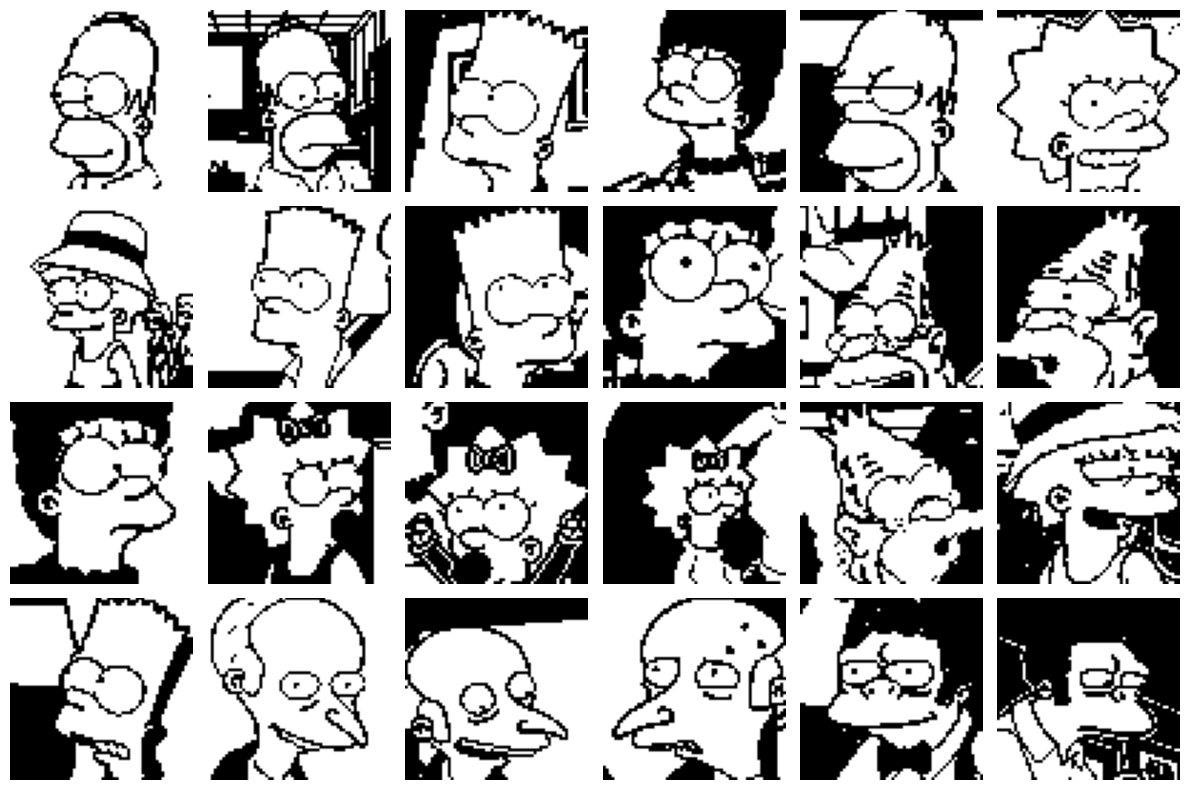

In [19]:
images = load_images(DISCRETE_IMG_DIR, shape=IMG_SHAPE, binary=True)
plot_images(images)

In [20]:
hopefield_network = ClassicHopfield()
hopefield_network.store_patterns(images)

modern_hopefield_network = DiscreteHopfield()
modern_hopefield_network.store_patterns(images)

Modified image (half blackened):


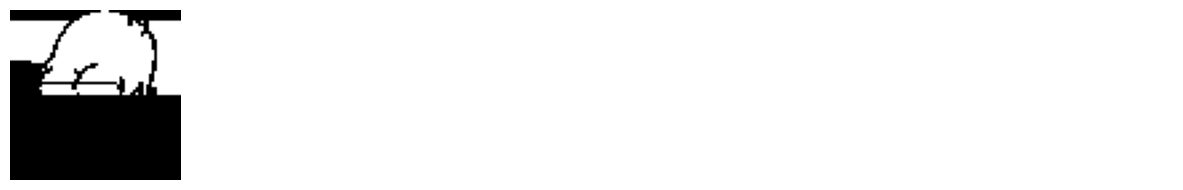

In [21]:
modified_images = blacken_half_image(images[4].copy())
print("Modified image (half blackened):")
plot_images([modified_images.reshape(IMG_SHAPE)])

Iteration #1: Energy=-18797626.0000 (Delta E = -14924208.0000), State=[-1  1 -1 ...  1 -1 -1]
Iteration #2: Energy=-29209750.0000 (Delta E = -10412124.0000), State=[-1 -1 -1 ... -1 -1 -1]
Iteration #3: Energy=-30411686.0000 (Delta E = -1201936.0000), State=[-1 -1 -1 ... -1 -1 -1]
Iteration #4: Energy=-30467526.0000 (Delta E = -55840.0000), State=[-1 -1 -1 ... -1 -1 -1]
Iteration #5: Energy=-30473362.0000 (Delta E = -5836.0000), State=[-1 -1 -1 ... -1 -1 -1]
Iteration #6: Energy=-30473562.0000 (Delta E = -200.0000), State=[-1 -1 -1 ... -1 -1 -1]
Iteration #7: Energy=-30473562.0000 (Delta E = 0.0000), State=[-1 -1 -1 ... -1 -1 -1]
Recovered image:


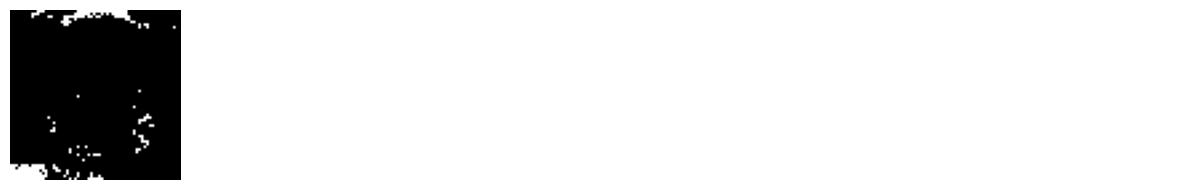

In [ ]:
recovered_image = hopefield_network.retrieve(modified_images.copy(), mode="sync", max_iter=1000)

print("Recovered image:")
plot_images([recovered_image.reshape(IMG_SHAPE)])

d:\.projects\hopfield\HopfieldNet\ModernHopfield.py:50: RuntimeWarning: overflow encountered in exp
  energy = -np.exp(log_sum_exp_val)


Iteration 1: State=[-1 -1 -1 ...  1  1  1]
Iteration 2: State=[-1 -1 -1 ...  1  1  1]
Recovered image:


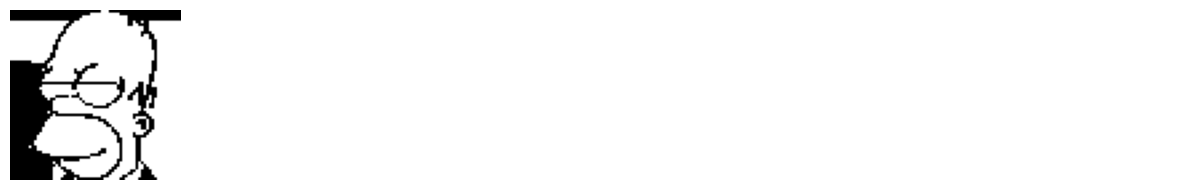

In [23]:
retrieved_image = modern_hopefield_network.retrieve(modified_images.copy(), max_iter=2)

print("Recovered image:")
plot_images([retrieved_image.reshape(IMG_SHAPE)])

In [24]:
images = load_images(CONTINUOUS_IMG_DIR, shape=IMG_SHAPE, binary=False)

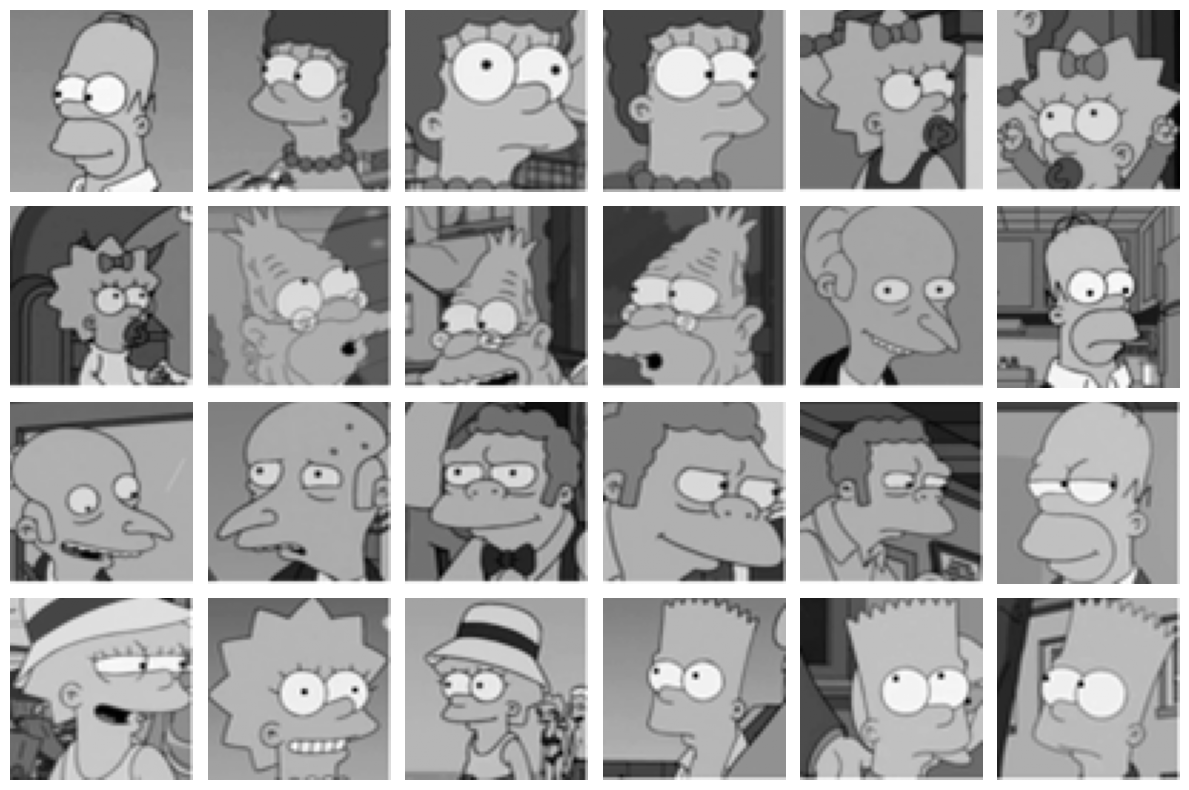

In [25]:
continuous_hopefield_network = ContinuousHopfield(beta=1)
continuous_hopefield_network.store_patterns(np.array(images))

plot_images(continuous_hopefield_network.patterns, n_cols=6)

Modified image (half grayened):


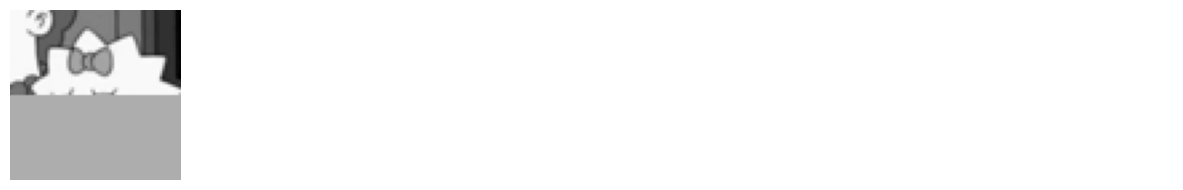

modified_images [0.39607844 0.39607844 0.39607844 ... 0.         0.         0.        ]


In [26]:
modified_images = grayen_half_image(images[np.random.randint(0, len(images))].copy())
print("Modified image (half grayened):")
plot_images([modified_images.reshape(IMG_SHAPE)])

print("modified_images", modified_images)

Recovered image:


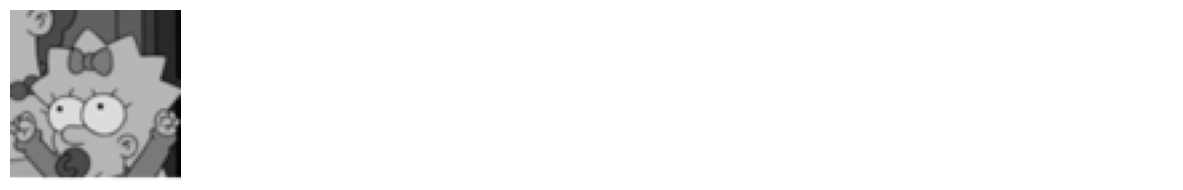

In [27]:
retrieved_image = continuous_hopefield_network.retrieve(modified_images.copy())
print("Recovered image:")
plot_images([retrieved_image.reshape(IMG_SHAPE)])